# Can the Binomial Distribution be used to calculate how lucky Dream was?

Many have used the binomial distribution to estimate the probability that Dream got as lucky as he did (https://www.youtube.com/watch?v=-MYw9LcLCb4, https://www.youtube.com/watch?v=8Ko3TdPy0TU, https://www.youtube.com/watch?v=rbhx3UNpV64). But Dream's astrophysicist argues that the binomial distribution cannot be applied because the events are not independent.  He acknowledges that the outcome of one event does not affect the outcome of another event ("For example, the fact that the previous barter was an ender pearl doesn’t affect the probability on the next barter.") However, he correctly points out that number of events is dependent on whether earlier events were successful or not. For example, Dream killed 305 blazes and had 211 blaze rod drops. The 305th kill dropped a blaze rod. But one could argue that he would have not killed the 305th blaze if the 304th blaze had dropped a rod. So the number of events is not independent of the outcomes. This is even more noticeable when considering piglin bartering, because it is more likely to see many barters happen in between successes.
This potentially means that the binomial distribution does not apply.  It seems likely that the binomial distribution will be very close to modeling the true probability, but I want to know how close. I am going to investigate this with simulations. The simulations will approximate Dream's behavior (killing blazes 33 times, choosing to stop at either 6, 7, or 8 rods as often as he did, dying as often as he did, and the same thing with ender pearls). I will run 500,000 of these simulations to see the distribution of the proportion of blazes that dropped rods. Then, to simulate the binomial distribution, the simulation will kill 305 blazes and see what proportion of blaze rods are dropped. To check whether the binomial distribution approximates the speedrun distribution, I will overlay the histograms and see what they look like. If the speedrun distribution has a significantly larger tail than the binomial distribution, then it might be incorrect for everyone to use the binomial distribution in this situation.

#### Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Functions to Perform Simulations

### Simulating Minecraft Speedruns

In [2]:
# Helper functions for run_trial()
def choose_random_num_successes_needed(num_successes_needed2prob):
    r = np.random.random()
    current_prob = 0
    for n in num_successes_needed2prob:
        current_prob += num_successes_needed2prob[n]
        if r < current_prob:
            return n
    raise ValueError("Did not select a num_successes_needed")

In [3]:
def run_trial(num_speedruns, num_successes_needed2prob, success_prob, death_prob):
    """
    Arguments
    =========
    num_speedruns = how many speedruns are performed for this trial
    num_successes_needed2prob = a dictionary mapping the number of successes needed to finish a speedrun
                                to the probability of that number being the one used on a speedrun
    success_prob = the probability of success for a single outcome
    death_prob = the probability of dying after each event
    
    Returns
    =======
    Returns a tuple (num_successes, num_events)
    """
    total_num_successes = 0
    total_num_events = 0
    
    # Make sure the probabilities of the num_successes_needed adds to 1
    if np.abs(sum(num_successes_needed2prob.values()) - 1) > 0.01:
        raise ValueError("Probabilities of num_successes_needed do not sum to 1")
    
    for _ in range(num_speedruns):
        k = choose_random_num_successes_needed(num_successes_needed2prob)
        num_successes = 0
        num_events = 0
        
        # Perform the event until k successes happen
        while num_successes < k:
            outcome = np.random.random()
            if outcome < success_prob:
                num_successes += 1
            num_events += 1
            
            # If the player dies, stop early
            possible_death = np.random.random()
            if possible_death < death_prob:
                break
        
        total_num_successes += num_successes
        total_num_events += num_events
    
    return (total_num_successes, total_num_events)

In [4]:
def run_simulation(num_trials, num_speedruns_per_trial, num_successes_needed2prob, success_prob, death_prob):
    """
    Arguments
    =========
    num_trials = total number of trials to do
    num_speedruns_per_trial = how many speedruns are performed for each trial
    num_successes_needed2prob = a dictionary mapping the number of successes needed to finish a speedrun
                                to the probability of that number being the one used on a speedrun
    success_prob = the probability of success for a single outcome
    death_prob = the probability of dying after each event
    
    Returns
    =======
    Returns a list of proportions (successes/events)
    """
    proportions = []
    for _ in range(num_trials):
        result = run_trial(num_speedruns_per_trial, num_successes_needed2prob, success_prob, death_prob)
        proportion = result[0] / float(result[1])
        proportions.append(proportion)
    
    return proportions

### Binomial Distribution Simulations

In [5]:
def run_binomial_trial(num_events, success_prob):
    """
    Arguments
    =========
    num_events = the number of random events to do
    success_prob = probability of success of any event
    
    Returns
    =======
    Returns tuple (num_successes, num_events)
    """
    num_successes = 0
    
    for _ in range(num_events):
        outcome = np.random.random()
        if outcome < success_prob:
            num_successes += 1
    
    return (num_successes, num_events)

In [6]:
def run_binomial_simulation(num_trials, num_events_per_trial, success_prob):
    """
    Arguments
    =========
    num_trials = number of trials to run
    num_events_per_trial = the number of random events to do for each trial
    success_prob = probability of success of any event
    
    Returns
    =======
    Returns a list of proportions (successes/events)
    """
    proportions = []
    
    for _ in range(num_trials):
        result = run_binomial_trial(num_events_per_trial, success_prob)
        proportions.append(result[0] / float(result[1]))
    
    return proportions

## Simulating Blaze Data

### Speedrun Simulations

In [7]:
num_trials = 500000

# These match Dream's data from the 6 livestreams
blaze_num_speedruns_per_trial = 33
blaze_num_successes_needed2prob = {6: 4/float(27), 7: 13/float(27), 8: 10/float(27)}
blaze_success_prob = 0.5
num_blazes_dream_killed = 305
blaze_death_prob = 6/float(305)

In [8]:
blaze_speedrun_results = run_simulation(num_trials, blaze_num_speedruns_per_trial, blaze_num_successes_needed2prob, blaze_success_prob, blaze_death_prob)

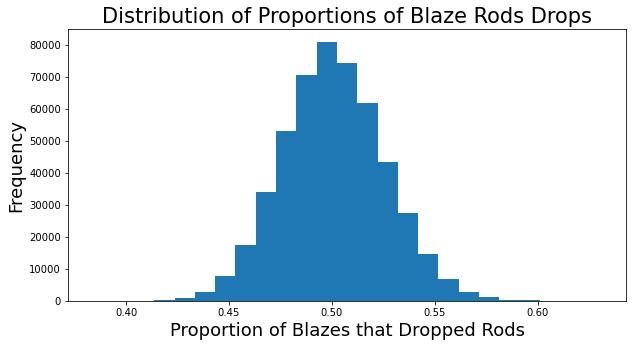

In [9]:
plt.figure(figsize=(10,5))
plt.hist(blaze_speedrun_results, bins=25)
plt.title("Distribution of Proportions of Blaze Rods Drops", fontsize=21)
plt.xlabel("Proportion of Blazes that Dropped Rods", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

In [10]:
df_blaze_speedrun = pd.DataFrame(blaze_speedrun_results)
df_blaze_speedrun.describe()

,0
count,500000.000000
mean,0.500982
std,0.024640
min,0.384134
25%,0.484108
50%,0.500000
75%,0.517241
max,0.630682


### Binomial Simulations

In [11]:
blaze_binomial_results = run_binomial_simulation(num_trials, num_blazes_dream_killed, 0.5)

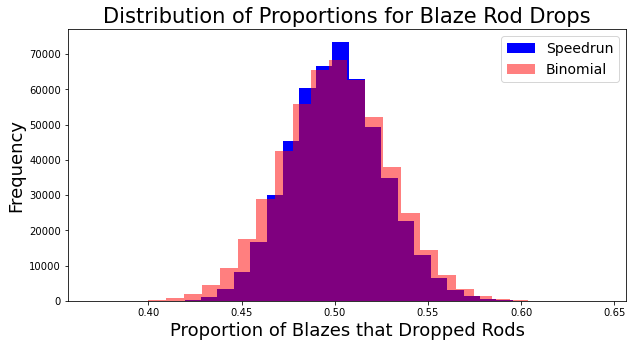

In [27]:
plt.figure(figsize=(10,5))
plt.hist(blaze_speedrun_results, bins=28, color='blue', alpha=1.0, label='Speedrun')
plt.hist(blaze_binomial_results, bins=28, color='red', alpha=0.5, label='Binomial')
plt.title("Distribution of Proportions for Blaze Rod Drops", fontsize=21)
plt.xlabel("Proportion of Blazes that Dropped Rods", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [13]:
df_blaze_binomial = pd.DataFrame(blaze_binomial_results)
df_blaze_binomial.describe()

,0
count,500000.000000
mean,0.500055
std,0.028624
min,0.370492
25%,0.481967
50%,0.501639
75%,0.518033
max,0.642623


## Simulating Ender Pearl Data

### Speedrun Simulations

In [14]:
num_trials = 500000

# These match Dream's data from the 6 livestreams
ender_num_speedruns_per_trial = 33
ender_num_successes_needed2prob = {2: 14/float(17), 3: 2/float(17), 5: 1/float(17)}
ender_success_prob = 0.047
num_ingots_dream_bartered = 262
ender_death_prob = 5/float(num_ingots_dream_bartered)

In [15]:
ender_speedrun_results = run_simulation(num_trials, ender_num_speedruns_per_trial, ender_num_successes_needed2prob, ender_success_prob, ender_death_prob)

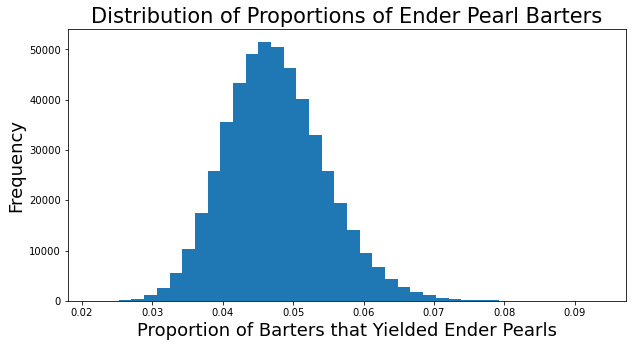

In [16]:
plt.figure(figsize=(10,5))
plt.hist(ender_speedrun_results, bins=40)
plt.title("Distribution of Proportions of Ender Pearl Barters", fontsize=21)
plt.xlabel("Proportion of Barters that Yielded Ender Pearls", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

In [17]:
df_ender_speedrun = pd.DataFrame(ender_speedrun_results)
df_ender_speedrun.describe()

,0
count,500000.000000
mean,0.047547
std,0.007126
min,0.021641
25%,0.042576
50%,0.047101
75%,0.052023
max,0.093682


### Binomial Simulations

In [18]:
ender_binomial_results = run_binomial_simulation(num_trials, num_ingots_dream_bartered, 0.047)

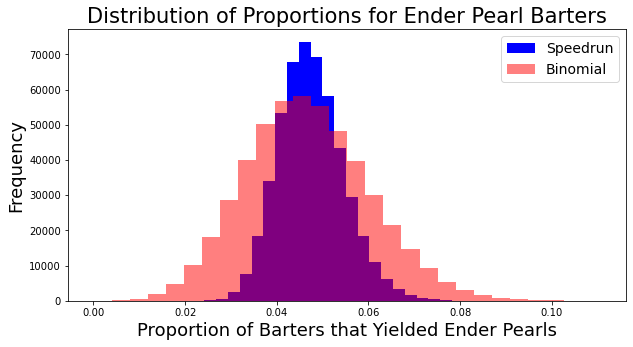

In [25]:
plt.figure(figsize=(10,5))
plt.hist(ender_speedrun_results, bins=28, color='blue', alpha=1.0, label='Speedrun')
plt.hist(ender_binomial_results, bins=28, color='red', alpha=0.5, label='Binomial')
plt.title("Distribution of Proportions for Ender Pearl Barters", fontsize=21)
plt.xlabel("Proportion of Barters that Yielded Ender Pearls", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [20]:
df_ender_binomial = pd.DataFrame(ender_binomial_results)
df_ender_binomial.describe()

,0
count,500000.000000
mean,0.047005
std,0.013071
min,0.000000
25%,0.038168
50%,0.045802
75%,0.057252
max,0.110687


# Analysis
For blaze rods, the distributions are almost the same. The binomial distribution is slightly wider.  For ender pearl barters, the binomial distribution has a much bigger tail.  This indicates that using the binomial distribution makes Dream look less guilty, if anything. If we did a bigger simulation of the speedrunning distribution and tried to calculate how lucky Dream was, his luck would look even more unlikely than it does with the binomial distribution.